In [13]:
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import time

In [14]:
dataset = pd.read_csv('new_appdata10.csv')

In [15]:
#### Data Pre-Processing ####

# Splitting Independent and Response Variables
response = dataset["enrolled"]
dataset = dataset.drop(columns="enrolled")

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [16]:
X_train

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
20330,315793,2,20,32,5,0,1,1,0,0,...,0,0,0,0,0,2,0,0,0,2
17532,103347,1,21,22,42,1,0,0,1,1,...,0,0,0,0,0,13,0,1,0,1
45819,373340,0,4,26,85,1,0,0,0,1,...,0,0,0,0,0,10,0,2,1,2
34807,324006,4,13,25,24,1,0,0,1,0,...,0,0,0,0,0,10,0,0,0,1
31888,248759,3,16,50,11,0,0,0,1,0,...,0,0,0,0,0,3,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,312924,5,23,19,6,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
45891,291893,0,15,22,4,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
42613,221546,3,6,25,43,0,0,0,0,1,...,0,0,0,0,0,4,6,0,0,0
43567,116320,4,13,27,4,1,0,1,0,0,...,0,0,0,0,0,2,0,0,0,0


In [17]:
# Removing Identifiers
train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [23]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [24]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [26]:
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [27]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred) # tp / (tp + fp)
recall_score(y_test, y_pred) # tp / (tp + fn)
f1_score(y_test, y_pred)




0.7658930373360243

In [29]:
precision_score(y_test, y_pred) # tp / (tp + fp)

0.7617422721798475

In [30]:
recall_score(y_test, y_pred) # tp / (tp + fn)

0.7700892857142857

In [31]:
f1_score(y_test, y_pred)

0.7658930373360243

Test Data Accuracy: 0.7680


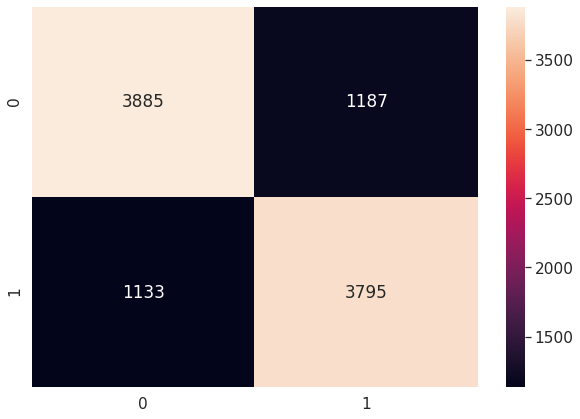

In [28]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [32]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))


SVM Accuracy: 0.767 (+/- 0.009)


In [33]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(dataset.drop(columns = 'user').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)


,features,coef
0,dayofweek,0.032715
1,hour,-0.003747
2,age,-0.149793
3,numscreens,-0.131250
4,minigame,-0.026619
5,used_premium_feature,-0.066105
6,liked,0.010852
7,location,-0.028831
8,Institutions,-0.062297
9,VerifyPhone,0.650615


In [35]:

# Formatting Final Results
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)


In [36]:
print(final_results)

        user  enrolled  predicted_reach
0     239786         1                1
1     279644         1                1
2      98290         0                0
3     170150         1                1
4     237568         1                1
...      ...       ...              ...
9995  143036         1                0
9996   91158         1                1
9997  248318         0                0
9998  142418         1                1
9999  279355         1                1

[10000 rows x 3 columns]
